In [12]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

MODEL_DIR = './mnist_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15426, saving model to ./mnist_model/01-0.1543.hdf5

Epoch 00002: val_loss improved from 0.15426 to 0.10403, saving model to ./mnist_model/02-0.1040.hdf5

Epoch 00003: val_loss improved from 0.10403 to 0.08497, saving model to ./mnist_model/03-0.0850.hdf5

Epoch 00004: val_loss improved from 0.08497 to 0.07697, saving model to ./mnist_model/04-0.0770.hdf5

Epoch 00005: val_loss improved from 0.07697 to 0.06854, saving model to ./mnist_model/05-0.0685.hdf5

Epoch 00006: val_loss improved from 0.06854 to 0.06091, saving model to ./mnist_model/06-0.0609.hdf5

Epoch 00007: val_loss did not improve from 0.06091

Epoch 00008: val_loss improved from 0.06091 to 0.05849, saving model to ./mnist_model/08-0.0585.hdf5

Epoch 00009: val_loss improved from 0.05849 to 0.05745, saving model to ./mnist_model/09-0.0575.hdf5

Epoch 00010: val_loss did not improve from 0.05745

Epoch 00011: val_loss did not improve from 0.05745

Epoch 00012: val_loss did not i

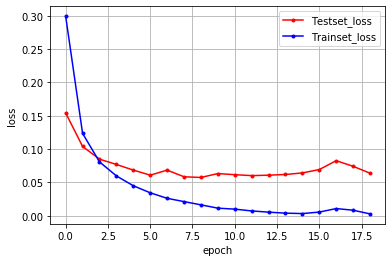

In [13]:
Y_vloss = history.history['val_loss']
Y_loss = history.history['loss']

X_len = np.arange(len(Y_loss))
plt.plot(X_len, Y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(X_len, Y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()